<a href="https://colab.research.google.com/github/SoniaVG/Analysis-of-data/blob/main/Covid_19_Descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data obtained from the Ministry of Health in Mexico, from COVID-19 in Mexico**

**The purpose of this analysis is merely descriptive.**

In [ ]:
from google.colab import drive
from IPython.display import clear_output
# Sólo para limpiar la pantalla después de que haga la instalación
drive.mount('/content/drive')

# Read the data
import pandas as pd
datos = pd.read_csv("/content/drive/MyDrive/COVID-19-ABRIL.csv")
municipios = pd.read_csv("/content/drive/MyDrive/AGEEML_20211271318711.csv",encoding='latin-1')
mun_2 = pd.read_csv("/content/drive/MyDrive/misDatos3.csv",encoding='latin-1')
clear_output()

# **Data Cleaning**

**DESCRIPTION:**

*According to the dictionary provided by the Secretary of Health of Mexico, the cases where the classification is 1,2,3 and 7 are the cases where it is possible to know if the cases were positive or negative cases, in the rest they are not.*




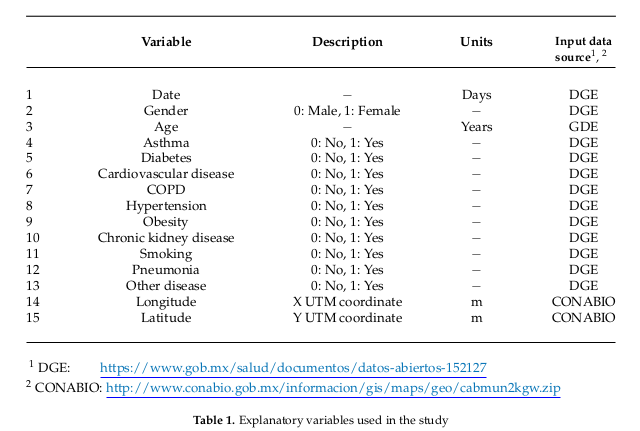

In [ ]:
# Drop some data

indice_eliminar=datos[(datos.CLASIFICACION_FINAL>3) & (datos.CLASIFICACION_FINAL<7)].index
datos=datos.drop(index=indice_eliminar)

In [ ]:
import numpy as np
print(datos.columns.array,"\n")
print("Clasificación final: ",datos.CLASIFICACION_FINAL.unique(),"\n")
print("Dimension de los datos:", datos.shape,"\n")

<PandasArray>
[               'ASMA',      'CARDIOVASCULAR', 'CLASIFICACION_FINAL',
            'DIABETES',                'EDAD',                'EPOC',
       'FECHA_INGRESO',        'HIPERTENSION',            'NEUMONIA',
            'OBESIDAD',            'OTRA_COM',       'RENAL_CRONICA',
                'SEXO',          'TABAQUISMO',         'ENTIDAD_RES',
       'MUNICIPIO_RES']
Length: 16, dtype: object 

Clasificación final:  [7 3 1 2] 

Dimension de los datos: (15119419, 16) 



In [ ]:
# Casos positivos
uno=datos[datos.CLASIFICACION_FINAL<4].index
# Casos negativos
cero=datos[datos.CLASIFICACION_FINAL==7].index
datos.loc[uno,"CLASIFICACION_FINAL"]=1
datos.loc[cero,"CLASIFICACION_FINAL"]=0
datos.head(3)

,ASMA,CARDIOVASCULAR,CLASIFICACION_FINAL,DIABETES,EDAD,EPOC,FECHA_INGRESO,HIPERTENSION,NEUMONIA,OBESIDAD,OTRA_COM,RENAL_CRONICA,SEXO,TABAQUISMO,ENTIDAD_RES,MUNICIPIO_RES
1,1,2,0,2,42,2,2020-04-22,2,2,2,2,2,1,2,14,85
2,2,2,1,2,35,2,2020-07-28,2,2,2,2,2,2,2,8,37
3,2,2,0,2,34,2,2021-02-28,2,99,2,2,2,1,2,24,35


In [ ]:
col_binarias=['SEXO','NEUMONIA','DIABETES', 'EPOC', 'ASMA','HIPERTENSION', 'OTRA_COM','CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
datos[col_binarias]=datos[col_binarias].replace([2,98,99], 0)
print(datos.shape)
datos.head(3)

(15119419, 16)


,ASMA,CARDIOVASCULAR,CLASIFICACION_FINAL,DIABETES,EDAD,EPOC,FECHA_INGRESO,HIPERTENSION,NEUMONIA,OBESIDAD,OTRA_COM,RENAL_CRONICA,SEXO,TABAQUISMO,ENTIDAD_RES,MUNICIPIO_RES
1,1,0,0,0,42,0,2020-04-22,0,0,0,0,0,1,0,14,85
2,0,0,1,0,35,0,2020-07-28,0,0,0,0,0,0,0,8,37
3,0,0,0,0,34,0,2021-02-28,0,0,0,0,0,1,0,24,35


In [ ]:
# Quitar filas duplicadas

COLUMNAS=['SEXO','ENTIDAD_RES', 'MUNICIPIO_RES','FECHA_INGRESO','NEUMONIA','EDAD','DIABETES', 'EPOC', 'ASMA','HIPERTENSION', 'OTRA_COM',
                 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
dt_sin_duplicados = datos.drop_duplicates(subset=COLUMNAS, keep=False)
dt_sin_duplicados.shape

(7718921, 16)

# **HISTOGRAMS**

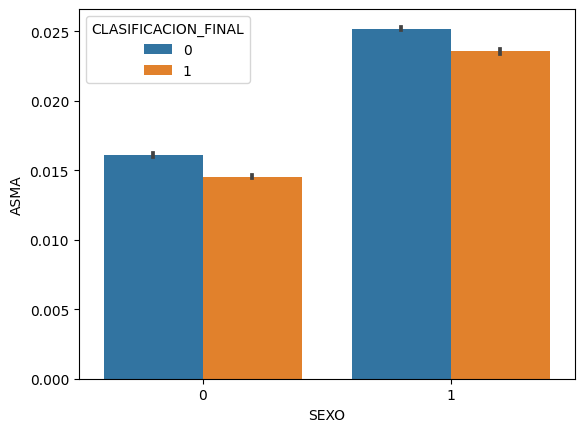

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.barplot(x = 'SEXO',#genero
            y = 'ASMA',
            hue = 'CLASIFICACION_FINAL', #nombre de las columnas binarias
            data = datos,
            estimator =np.mean)

plt.show()

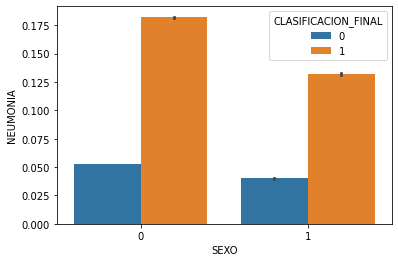

In [ ]:
sns.barplot(x = 'SEXO',
            y = 'NEUMONIA',
            hue = 'CLASIFICACION_FINAL',
            data = datos,
            estimator =np.mean)

plt.show()


# **BOX DIAGRAM**

**There are atypical values in the age variable, it would be important to consider removing them for further analysis.**

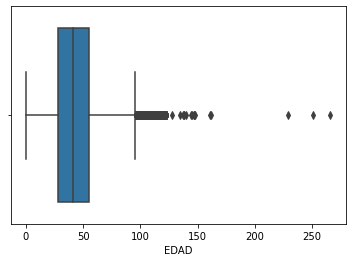

In [ ]:
# Es poco probable que algunas personas superen los 100 años
sns.boxplot(x=datos["EDAD"])

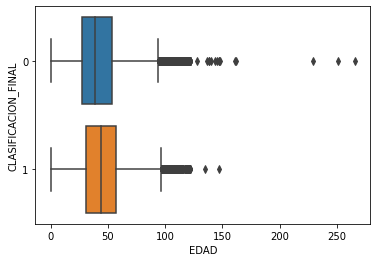

In [ ]:
sns.boxplot(data=datos, x=datos["EDAD"], y=datos["CLASIFICACION_FINAL"], orient="h")

# **Daily cases of COVID-19**

In [ ]:
#casos atravez del tiempo
datos['FECHA'] = pd.to_datetime(datos["FECHA_INGRESO"], format='%Y-%m-%d')
#print(datos.head())

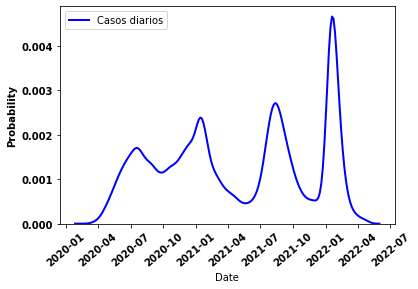

In [ ]:
#FUNCION DE DENSIDAD ATRAVEZ DEL TIEMPO CONSIDERANDO UNICAMENTE CASOS POSITIVOS
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
k1=datos[datos.CLASIFICACION_FINAL==1].FECHA
sns.kdeplot(k1,
           linewidth=2,
           color = 'b',
           vertical = False,
           label="Casos diarios"
           )

plt.xlabel('Date',fontweight='bold')
plt.xticks(rotation=40,fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel("Probability",fontweight='bold')
plt.legend()
plt.grid(False)

**Distribution function between MEN VS WOMEN**

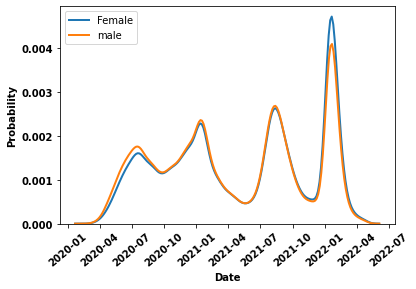

In [ ]:
k1=datos[(datos.CLASIFICACION_FINAL==1) & (datos.SEXO==1) ].FECHA #mujer
k2=datos[(datos.CLASIFICACION_FINAL==1) & (datos.SEXO==0) ].FECHA #hombre

def funcionDensidad(k,label):
  sns.kdeplot(k, #funcion de densidad de hombres y mujeres
             linewidth=2,
             #shade = True,  # Ya sea para llenar
             #color = 'r',   # Establecer color
             vertical = False,  # Establecer si nivelar
             label=label
             )

funcionDensidad(k1,"Female")
funcionDensidad(k2,"Male")
plt.xlabel('Date',fontweight='bold')
plt.xticks(rotation=40,fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel("Probability",fontweight='bold')
plt.legend()
plt.grid(False)

**Age distribution function**

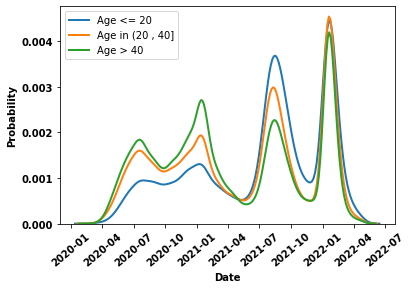

In [ ]:
#Por grupos de edad

k1=datos[(datos.CLASIFICACION_FINAL==1)  & (datos.EDAD<=20)].FECHA
k2=datos[(datos.CLASIFICACION_FINAL==1) &  (datos.EDAD>20) & (datos.EDAD<=40)].FECHA
k3=datos[(datos.CLASIFICACION_FINAL==1) &  (datos.EDAD>40 )].FECHA


funcionDensidad(k1,"Age <= 20")
funcionDensidad(k2,"Age in (20 , 40]")
funcionDensidad(k3,"Age > 40")

plt.xlabel('Date',fontweight='bold')
plt.xticks(rotation=40,fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel("Probability",fontweight='bold')
plt.legend()
plt.grid(False)

**HYPOTHESIS**

* Can the diseases be related to the diagnosis?
* Can the gender of the individual be related to the final result?
* Could age be related to the result?

